# Digit Recognizer





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

import itertools

from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

C:\Users\Portable\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Importation of the data

In [2]:
dataset = pd.read_csv('train.csv')
x_train = dataset.iloc[:,1:]
x_train = x_train
y_train = dataset.iloc[:,0]

# Visualization of the data

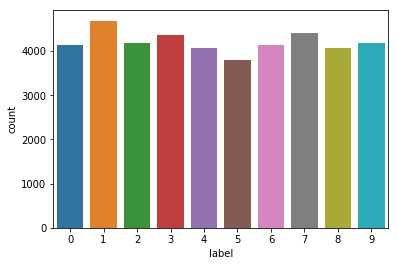

In [3]:
sns.countplot(y_train)

C:\Users\Portable\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


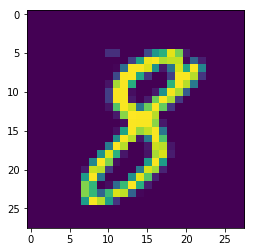

In [4]:
plt.imshow(np.reshape(x_train.iloc[20,:],(28,28)))

In [5]:
x_train = x_train.values.reshape(-1,28,28,1) / 255.0
y_train = to_categorical(y_train, num_classes = 10)

# Cross Validation

We take 90% of our data in x_train.

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)
del dataset

# Convolutional Neural Network

In [7]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 5, 5, input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(Convolution2D(32, 5, 5, input_shape = (28, 28, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

C:\Users\Portable\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\Portable\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu")`
  """
C:\Users\Portable\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Portable\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
C:\Users\Portable\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense

# Data Augmentation

In [8]:
dataGenerator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

dataGenerator.fit(x_train)

# Training

In [9]:
batch_size = 86

history = classifier.fit_generator(generator=dataGenerator.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 3, validation_data = (x_val,y_val),
                              verbose = 1)

Epoch 1/3
440/440 [==============================] - 228s 519ms/step - loss: 0.4752 - acc: 0.8463 - val_loss: 0.1430 - val_acc: 0.9610
Epoch 2/3
440/440 [==============================] - 227s 516ms/step - loss: 0.1546 - acc: 0.9523 - val_loss: 0.0777 - val_acc: 0.9779
Epoch 3/3
440/440 [==============================] - 227s 516ms/step - loss: 0.1108 - acc: 0.9664 - val_loss: 0.0496 - val_acc: 0.9855


# Prediction

In [10]:
x_test = pd.read_csv('test.csv') / 255.0

In [11]:
x_test.head()
x_test = x_test.values.reshape(-1,28,28,1)
y_pred = classifier.predict(x_test)

In [12]:
results = np.argmax(y_pred,axis = 1)
results=pd.DataFrame(np.array(results,dtype=int))
results.columns=['Label']

# Confusion Matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

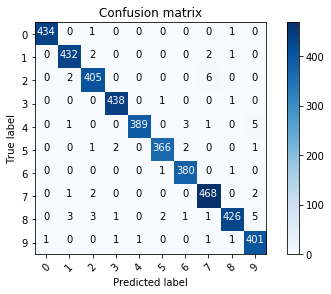

In [14]:
Y_pred = classifier.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Output File

In [15]:
ids = [i for i in range(1,28001)]
ids = pd.DataFrame(ids)
ids.columns = ['ImageId']

In [16]:
output = pd.concat([ids,results], axis=1)
output.to_csv(path_or_buf='result.csv',index=False)